<a href="https://colab.research.google.com/github/TarsilaSamille/ARQUITETURA/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# carrega bibliotecas

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve

# carregar base de dados

In [59]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dataset = pd.read_csv(url, names = attributes)
# dataset.columns = attributes
# dataset = pd.read_csv('data/data.csv')

In [60]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# visualizar dados

In [61]:
# tipos de colunas
dataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [62]:
# resumo numérico dos dados (média, desvio padrão, mínimo, máximo)
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
# número de exemplos em cada classe
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# analisar dados

In [64]:
# separar dados entre treino e teste
train, test = train_test_split(dataset,
                               test_size = 0.4,
                               stratify = dataset['class'],
                               random_state = 42)

In [65]:
# compara as bases de treino e teste
print('****---Treino:\n')
print(train.describe())
print(train.groupby('class').size())
print('\n\n****---Teste:\n')
print(test.describe())
print(test.groupby('class').size())

****---Treino:

       sepal_length  sepal_width  petal_length  petal_width
count     90.000000    90.000000     90.000000    90.000000
mean       5.867778     3.058889      3.794444     1.202222
std        0.861385     0.466855      1.780819     0.775318
min        4.300000     2.000000      1.100000     0.100000
25%        5.125000     2.800000      1.525000     0.300000
50%        5.750000     3.000000      4.200000     1.300000
75%        6.400000     3.300000      5.100000     1.875000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        30
Iris-versicolor    30
Iris-virginica     30
dtype: int64


****---Teste:

       sepal_length  sepal_width  petal_length  petal_width
count     60.000000    60.000000     60.000000    60.000000
mean       5.806667     3.046667      3.705000     1.193333
std        0.781105     0.381996      1.753101     0.751014
min        4.400000     2.300000      1.000000     0.200000
25%        5.075000     2.800000      1.60

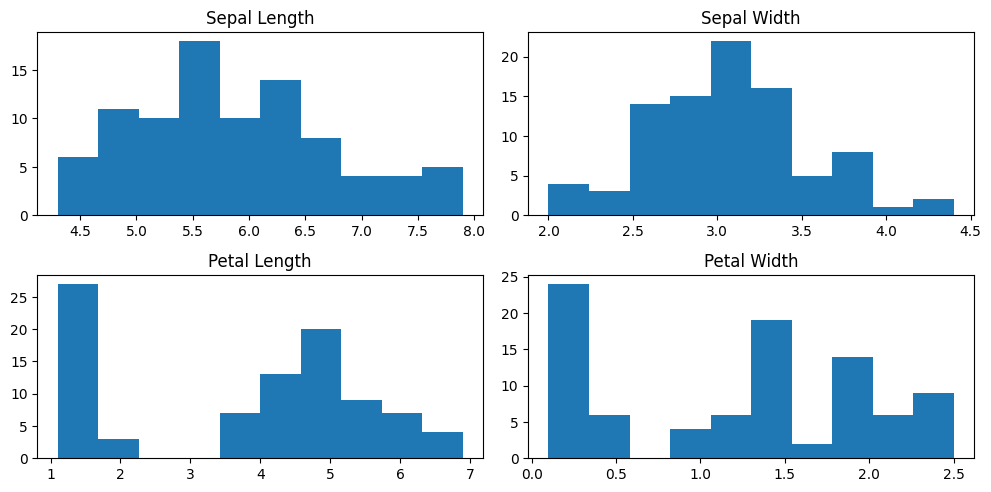

In [66]:
# histogramas
n_bins = 10
fig, axs = plt.subplots(2, 2, figsize=(10,5))
axs[0,0].hist(train['sepal_length'], bins = n_bins)
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(train['sepal_width'], bins = n_bins)
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(train['petal_length'], bins = n_bins)
axs[1,0].set_title('Petal Length')
axs[1,1].hist(train['petal_width'], bins = n_bins)
axs[1,1].set_title('Petal Width')

# espaço entre os gráficos
fig.tight_layout(pad=1.0)

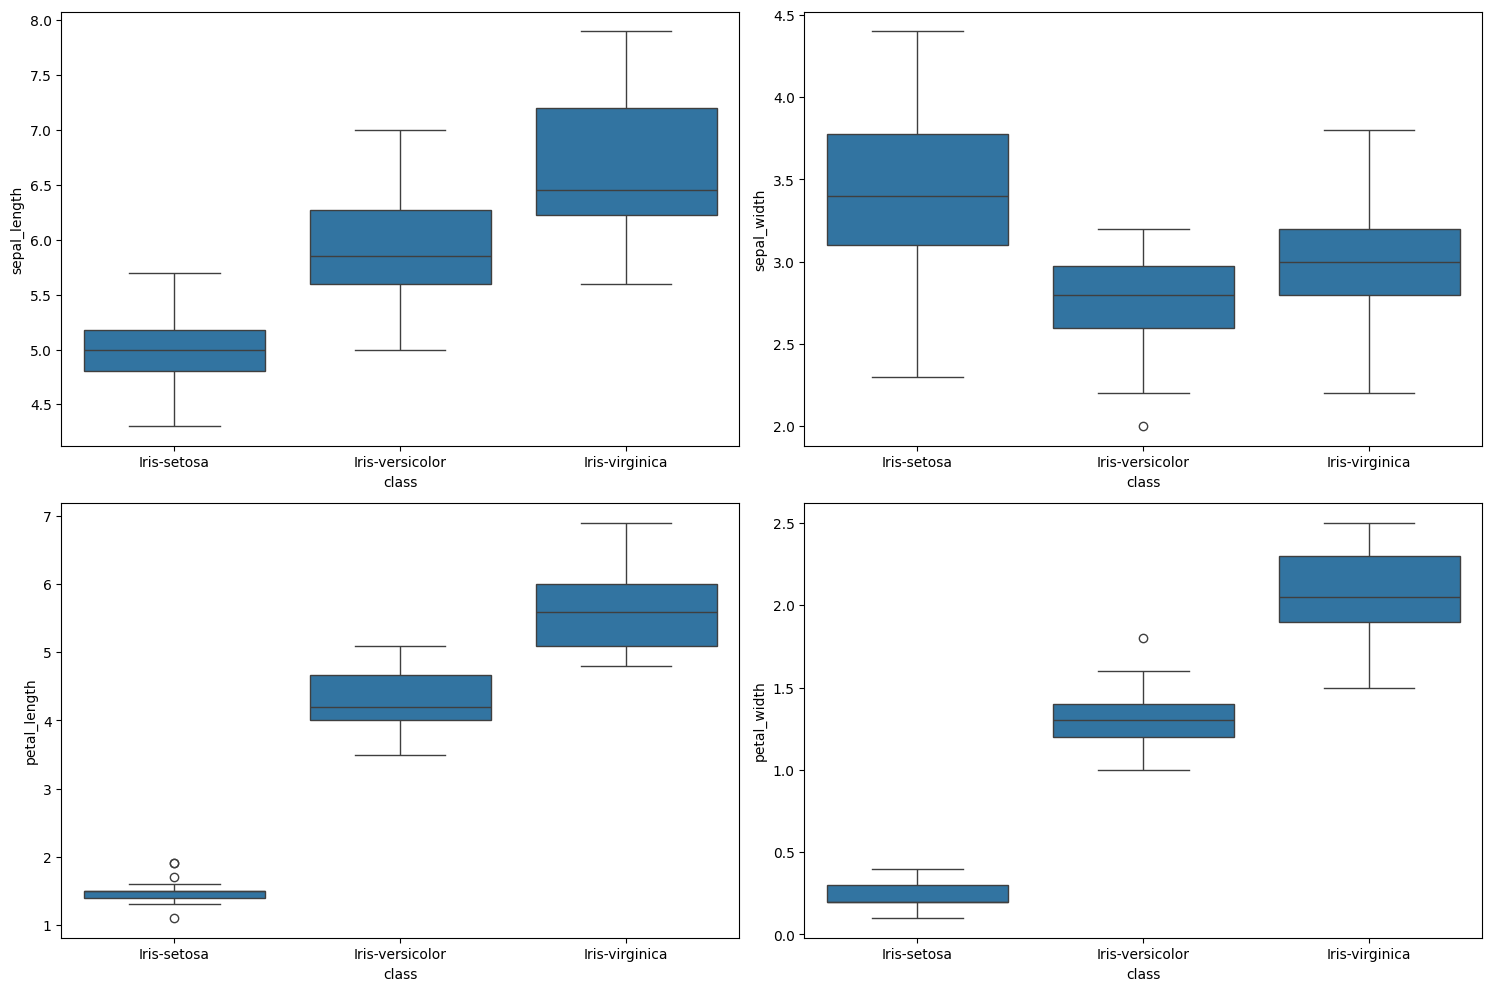

In [67]:
# boxplot
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'class', y = 'sepal_length', data = train, order = cn, ax = axs[0,0])
sns.boxplot(x = 'class', y = 'sepal_width',  data = train, order = cn, ax = axs[0,1])
sns.boxplot(x = 'class', y = 'petal_length', data = train, order = cn, ax = axs[1,0])
sns.boxplot(x = 'class', y = 'petal_width',  data = train, order = cn, ax = axs[1,1])
# add some spacing between subplots
fig.tight_layout(pad=1.0)

<ipython-input-68-84ef83c268b2>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(setosa_pl, color="blue", label="Setosa", ax = axs[0])
<ipython-input-68-84ef83c268b2>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(versicolor_pl, color="red", label="Versicolor", ax = axs[0])
<ipyt

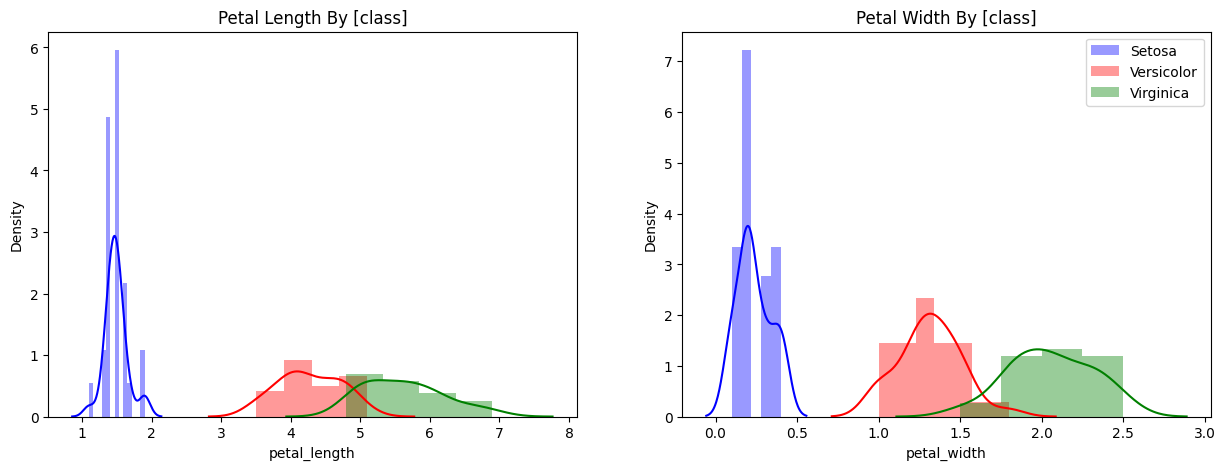

In [68]:
# right off the bat, we see that petal length/width can separate setosa from the others
# histogram by [class]
setosa_pl = train.loc[train["class"]=='Iris-setosa', 'petal_length']
versicolor_pl = train.loc[train["class"]=='Iris-versicolor', 'petal_length']
virginica_pl = train.loc[train["class"]=='Iris-virginica', 'petal_length']
setosa_pw = train.loc[train["class"]=='Iris-setosa', 'petal_width']
versicolor_pw = train.loc[train["class"]=='Iris-versicolor', 'petal_width']
virginica_pw = train.loc[train["class"]=='Iris-virginica', 'petal_width']

fig, axs = plt.subplots(1, 2, figsize=(15,5))

# set figure size
#fig.set_size_inches(10,4)
ax1 = sns.distplot(setosa_pl, color="blue", label="Setosa", ax = axs[0])
ax1.set_title('Petal Length By [class]')
ax1 = sns.distplot(versicolor_pl, color="red", label="Versicolor", ax = axs[0])
ax1 = sns.distplot(virginica_pl, color="green", label="Virginica", ax = axs[0])

ax2 = sns.distplot(setosa_pw, color="blue", label="Setosa", ax = axs[1])
ax2.set_title('Petal Width By [class]')
ax2 = sns.distplot(versicolor_pw, color="red", label="Versicolor", ax = axs[1])
ax2 = sns.distplot(virginica_pw, color="green", label="Virginica", ax = axs[1])

plt.legend()

# treinamento

In [69]:
# separar entradas e saídas
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train["class"]
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test["class"]

In [70]:
# MODELO 1: regressão logística
mod_lr = LogisticRegression(solver = 'newton-cg')
mod_lr.fit(X_train, y_train)
y_train_hat = mod_lr.predict(X_train)
acc = metrics.accuracy_score(y_train_hat,y_train)
print('Accuracy of Logistic Regression in the training set:',"{:.3f}".format(acc))

Accuracy of Logistic Regression in the training set: 0.967


In [71]:
# MODELO 2: SVM com kernel linear
mod_svm = SVC(kernel='linear')
mod_svm.fit(X_train, y_train)
y_train_hat = mod_svm.predict(X_train)
acc = metrics.accuracy_score(y_train_hat,y_train)
print('Accuracy of Linear SVM in the training set:',"{:.3f}".format(acc))

Accuracy of Linear SVM in the training set: 0.978


In [72]:
# MODELO 3: árvore de decisão
mod_dt = DecisionTreeClassifier(max_depth=3, random_state = 1)
mod_dt.fit(X_train,y_train)
acc = metrics.accuracy_score(y_train_hat,y_train)
print('Accuracy of decision tree classifier in the training set:',"{:.3f}".format(acc))

Accuracy of decision tree classifier in the training set: 0.978


# teste dos modelos

In [ ]:
import seaborn as sns

The accuracy of Logistic Regression is 0.950000


<Axes: >

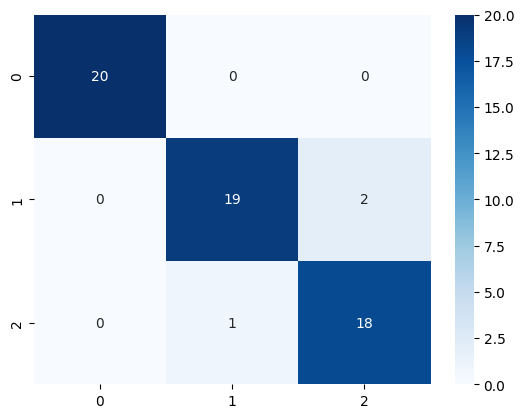

In [76]:
# Regressão logística: apresenta a base de teste ao modelo e obtém acurácia
y_test_hat = mod_lr.predict(X_test)
acc = metrics.accuracy_score(y_test_hat,y_test)
print('The accuracy of Logistic Regression is',"{:.6f}".format(acc))
cm = confusion_matrix(y_test_hat,y_test)
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')


The accuracy of SVM is 1.000000


<Axes: >

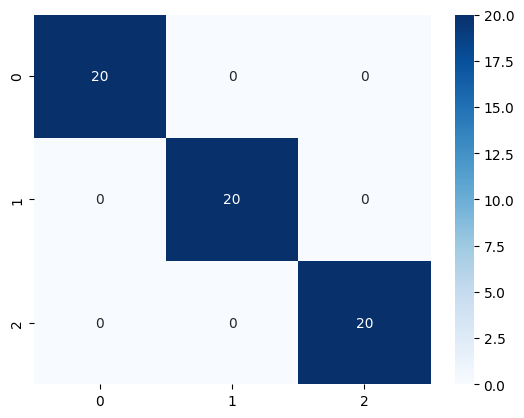

In [77]:
# SVM: apresenta a base de teste ao modelo e obtém acurácia
y_test_hat = mod_svm.predict(X_test)
acc = metrics.accuracy_score(y_test_hat,y_test)
print('The accuracy of SVM is {:.6f}'.format(acc))

cm = confusion_matrix(y_test_hat,y_test)
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')

The accuracy of SVM is 0.983333


<Axes: >

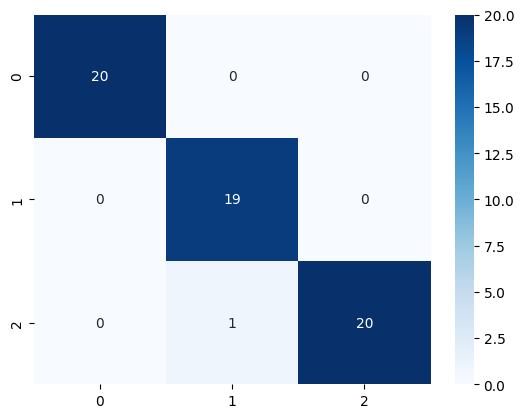

In [78]:
# Árvore de decisão: apresenta a base de teste ao modelo e obtém acurácia
y_test_hat = mod_dt.predict(X_test)
acc = metrics.accuracy_score(y_test_hat,y_test)
print('The accuracy of SVM is {:.6f}'.format(acc))

cm = confusion_matrix(y_test_hat,y_test)
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')

# observando overfitting, underfitting e ajuste de hiperparâmetros

In [80]:
# observando a importância do tamanho da base de dados
sizes = [0.2, 0.4, 0.6, 0.8, 1.0]

# MODELO 1
train_sizes, train_scores_model1, valid_scores_model1 = learning_curve(
    mod_lr,
    X_train, y_train,
    train_sizes=sizes,
    cv=5)

# MODELO 2
train_sizes, train_scores_model2, valid_scores_model2 = learning_curve(
    mod_svm,
    X_train, y_train,
    train_sizes=sizes,
    cv=5)

# MODELO 3
train_sizes, train_scores_model3, valid_scores_model3 = learning_curve(
    mod_dt,
    X_train, y_train,
    train_sizes=sizes,
    cv=5)

Text(0, 0.5, 'Accuracy')

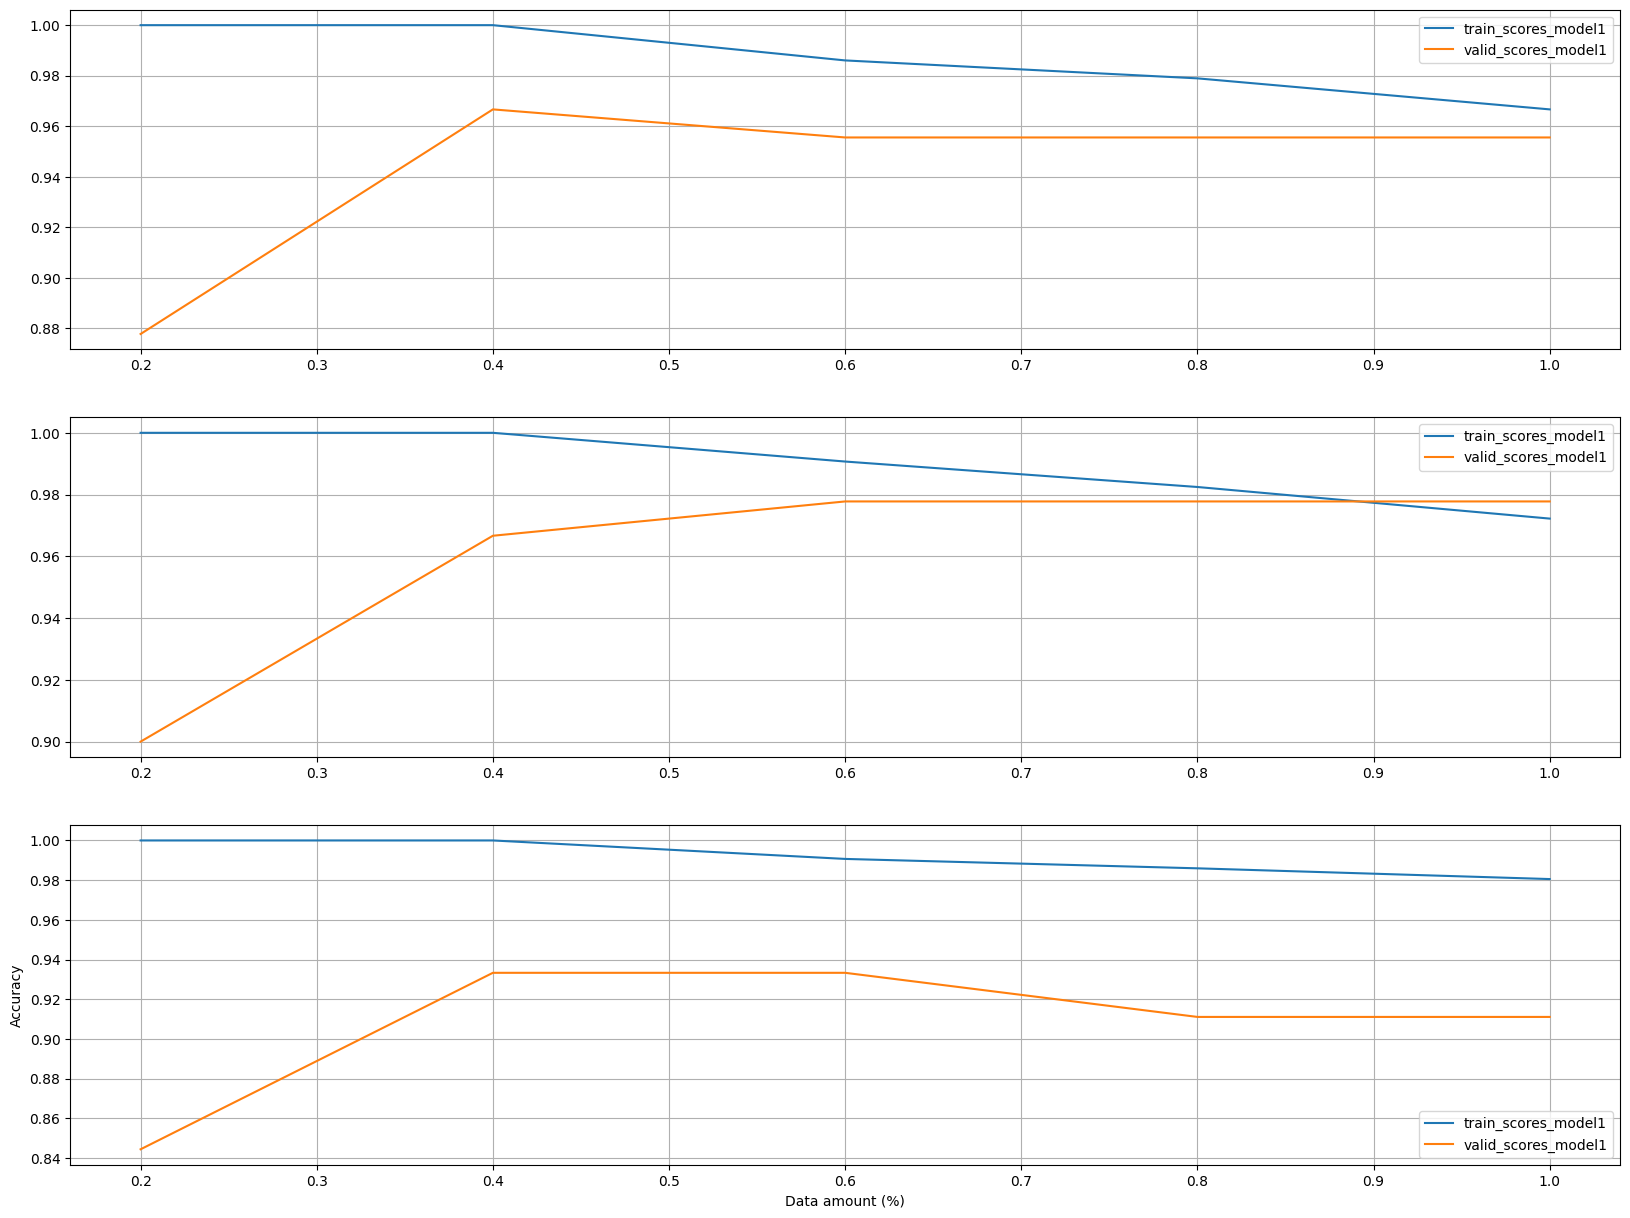

In [81]:
# produz gráfico de acurácia de classificação como função do tamanho da base de dados usada
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))

ax1.plot(sizes,np.mean(train_scores_model1, axis=1))
ax1.plot(sizes,np.mean(valid_scores_model1, axis=1))
ax1.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
ax1.grid()
plt.xlabel('Data amount (%)')
plt.ylabel('Accuracy')

ax2.plot(sizes,np.mean(train_scores_model2, axis=1))
ax2.plot(sizes,np.mean(valid_scores_model2, axis=1))
ax2.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
ax2.grid()
plt.xlabel('Data amount (%)')
plt.ylabel('Accuracy')

ax3.plot(sizes,np.mean(train_scores_model3, axis=1))
ax3.plot(sizes,np.mean(valid_scores_model3, axis=1))
ax3.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
ax3.grid()
plt.xlabel('Data amount (%)')
plt.ylabel('Accuracy')


In [82]:
# observando a importância do ajuste dos hiperparâmetros
train_scores_model1, valid_scores_model1 = validation_curve(
    mod_lr,
    X_train, y_train,
    param_name="C",
    param_range=np.linspace(0.1, 1, 10),
    cv=5)
train_scores_model2, valid_scores_model2 = validation_curve(
    mod_svm,
    X_train, y_train,
    param_name="C",
    param_range=np.linspace(0.1, 1, 10),
    cv=5)
train_scores_model3, valid_scores_model3 = validation_curve(
    mod_dt,
    X_train, y_train,
    param_name="min_weight_fraction_leaf",
    param_range=np.linspace(0, 0.1, 10),
    cv=5)

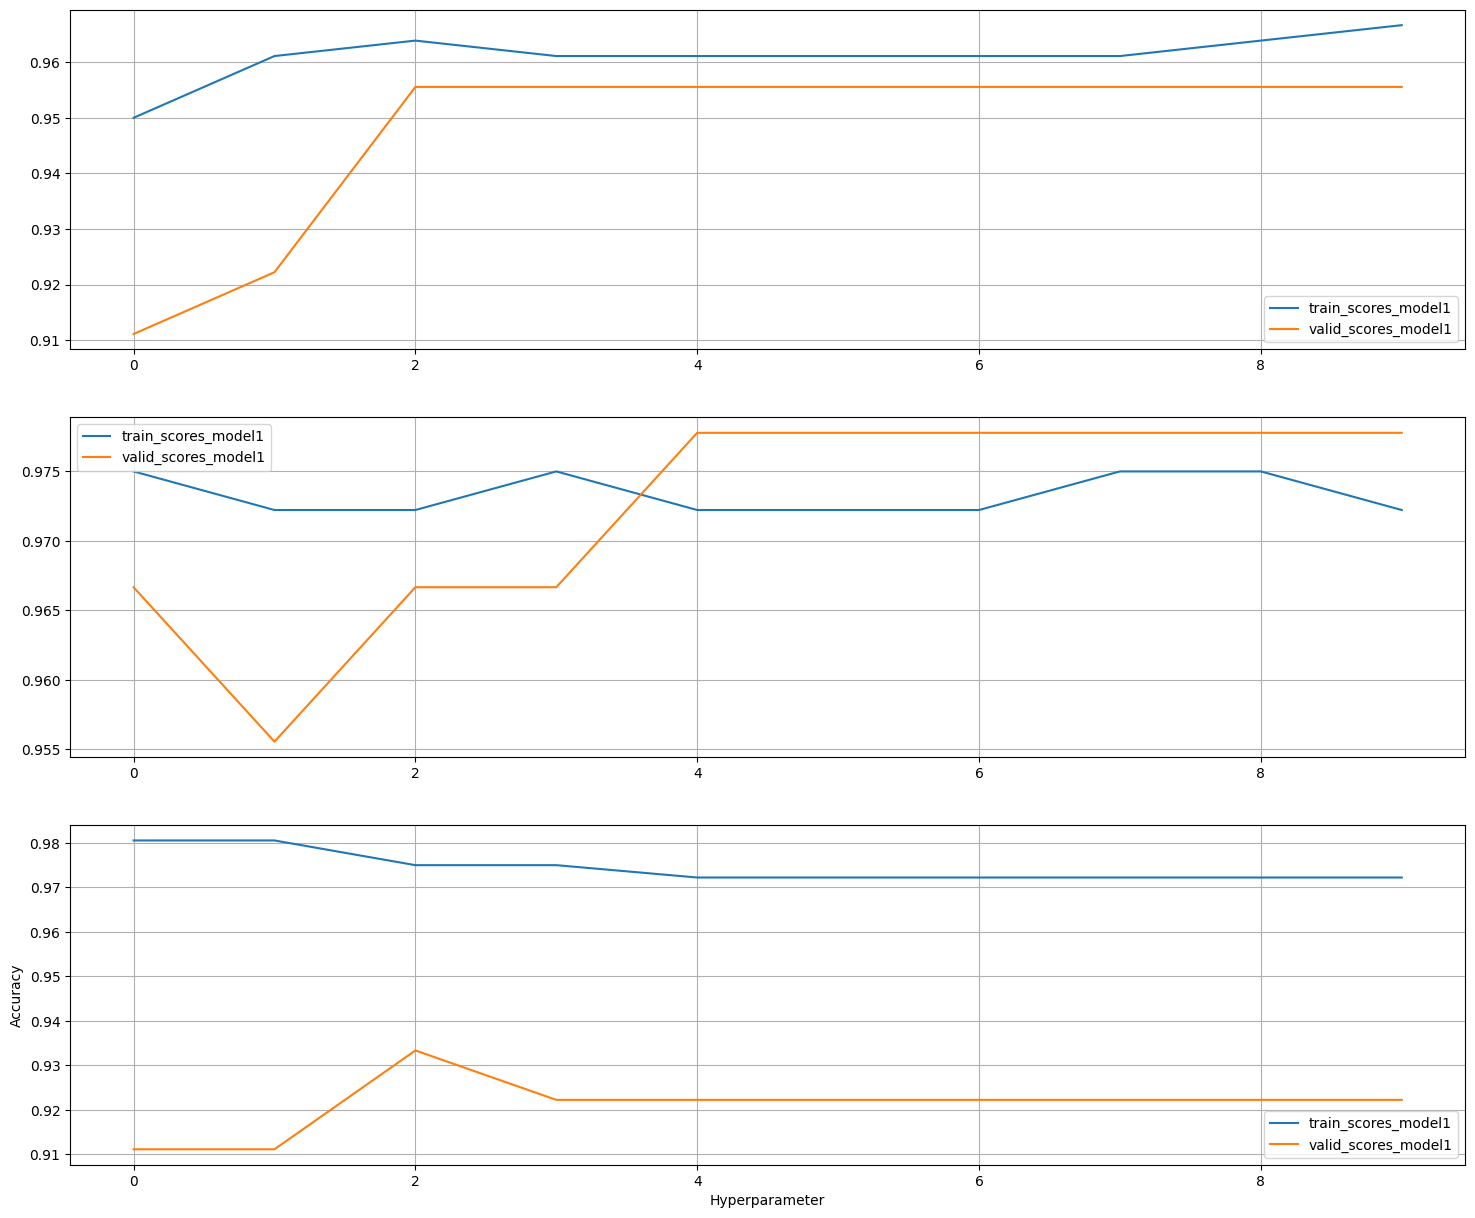

In [83]:
# produz gráfico de acurácia de classificação como função dos hiperparâmetros
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18,15))

ax1.plot(np.mean(train_scores_model1, axis=1))
ax1.plot(np.mean(valid_scores_model1, axis=1))
ax1.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
ax1.grid()
plt.xlabel('Hyperparameter')
plt.ylabel('Accuracy')

ax2.plot(np.mean(train_scores_model2, axis=1))
ax2.plot(np.mean(valid_scores_model2, axis=1))
ax2.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
ax2.grid()
plt.xlabel('Hyperparameter')
plt.ylabel('Accuracy')

ax3.plot(np.mean(train_scores_model3, axis=1))
ax3.plot(np.mean(valid_scores_model3, axis=1))
ax3.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
ax3.grid()
plt.xlabel('Hyperparameter')
plt.ylabel('Accuracy')
plt.show()